# HOUSE PRICE PREDICTION

## Project Overview

link dataset: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

The Boston Housing Dataset

Kumpulan Data Perumahan Boston berasal dari informasi yang dikumpulkan oleh Layanan Sensus AS mengenai perumahan di wilayah Boston MA. Berikut ini menjelaskan kolom kumpulan data:
*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town

*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population.
*   PRICE - Median value of owner-occupied homes in $1000's

## IMPORT DATA & MODULE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vikrishnan/boston-house-prices

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 24.5MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import  unzip_data

--2023-06-14 11:47:28--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-06-14 11:47:29 (66.4 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [6]:
unzip_data("/content/boston-house-prices.zip")

In [7]:
df = pd.read_csv('/content/housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
# Let's summarize the data to see the distribution of data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


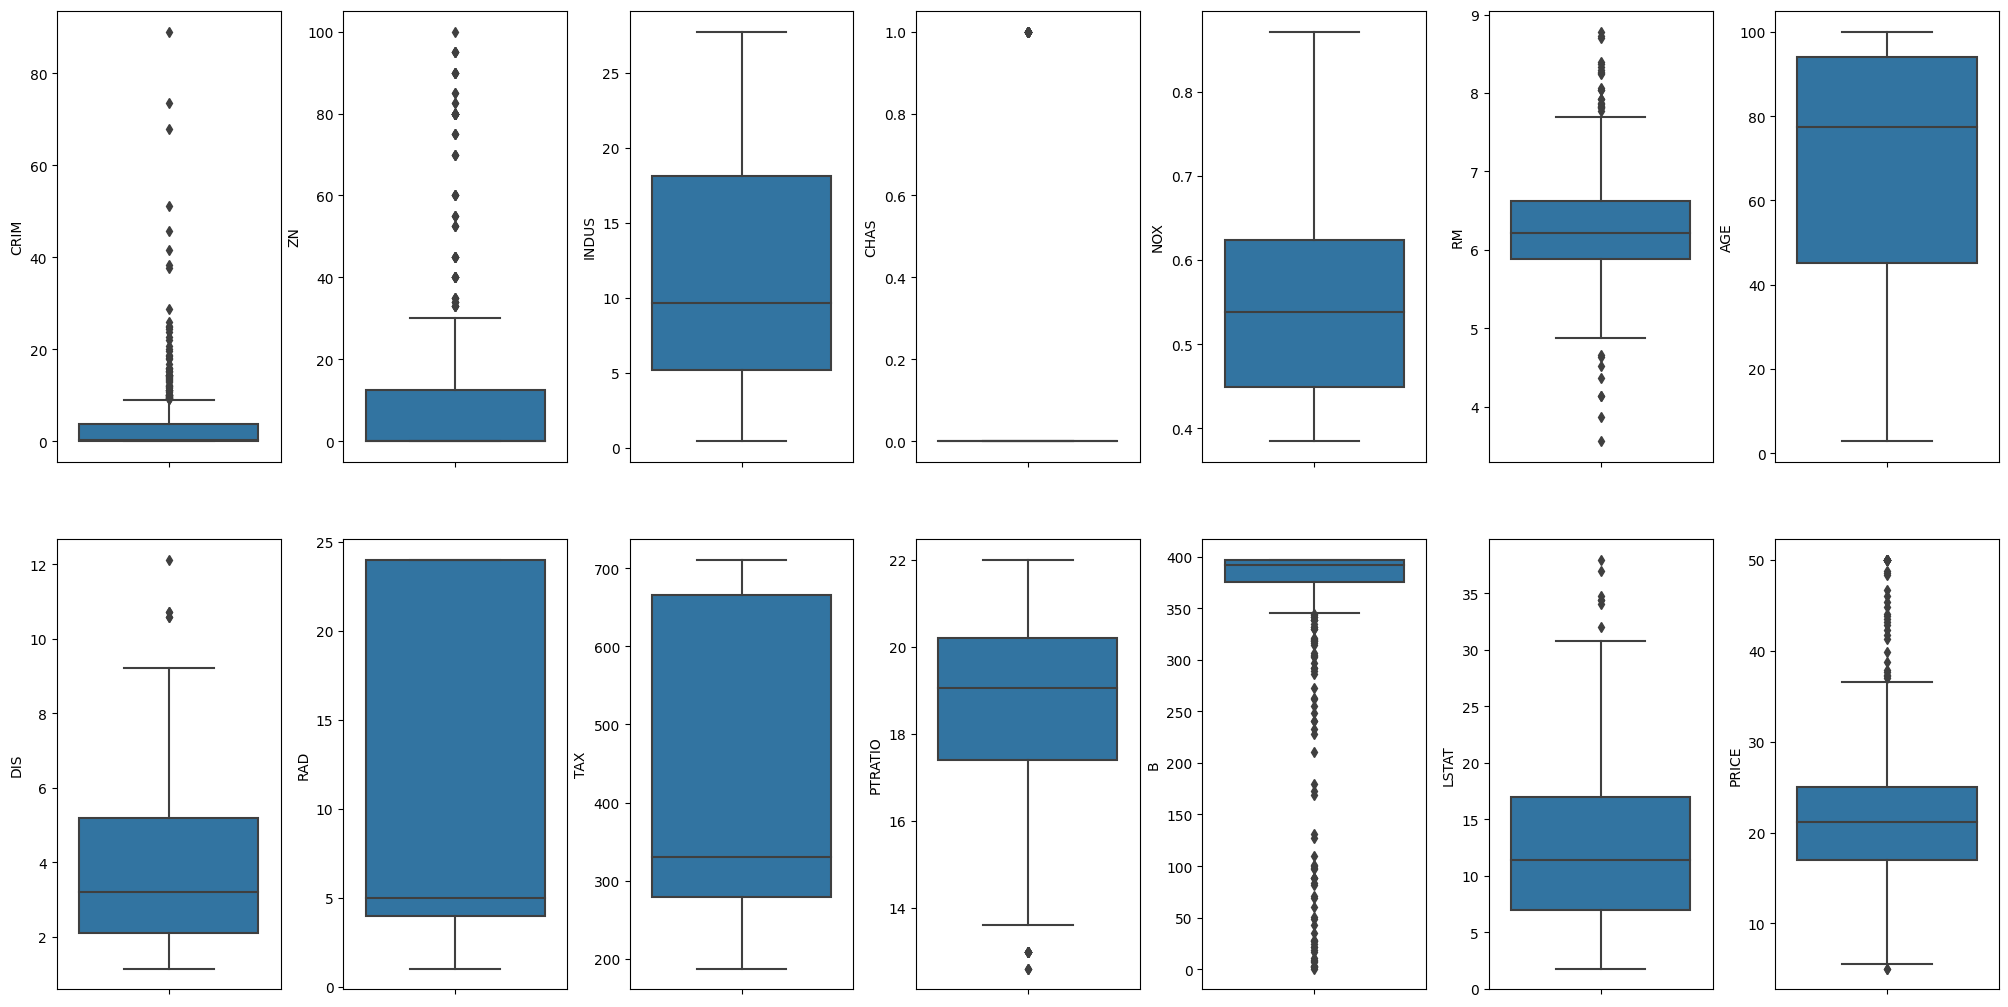

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Kolom seperti CRIM, ZN, RM, B tampaknya memiliki outlier. Mari lihat persentase outlier di setiap kolom.

In [14]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


Let's remove PRICE outliers (PRICE = 50.0) before plotting more distributions

In [15]:
df = df[~(df['PRICE'] >= 50.0)]
print(np.shape(df))

(490, 14)


In [16]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column PRICE outliers = 4.49%


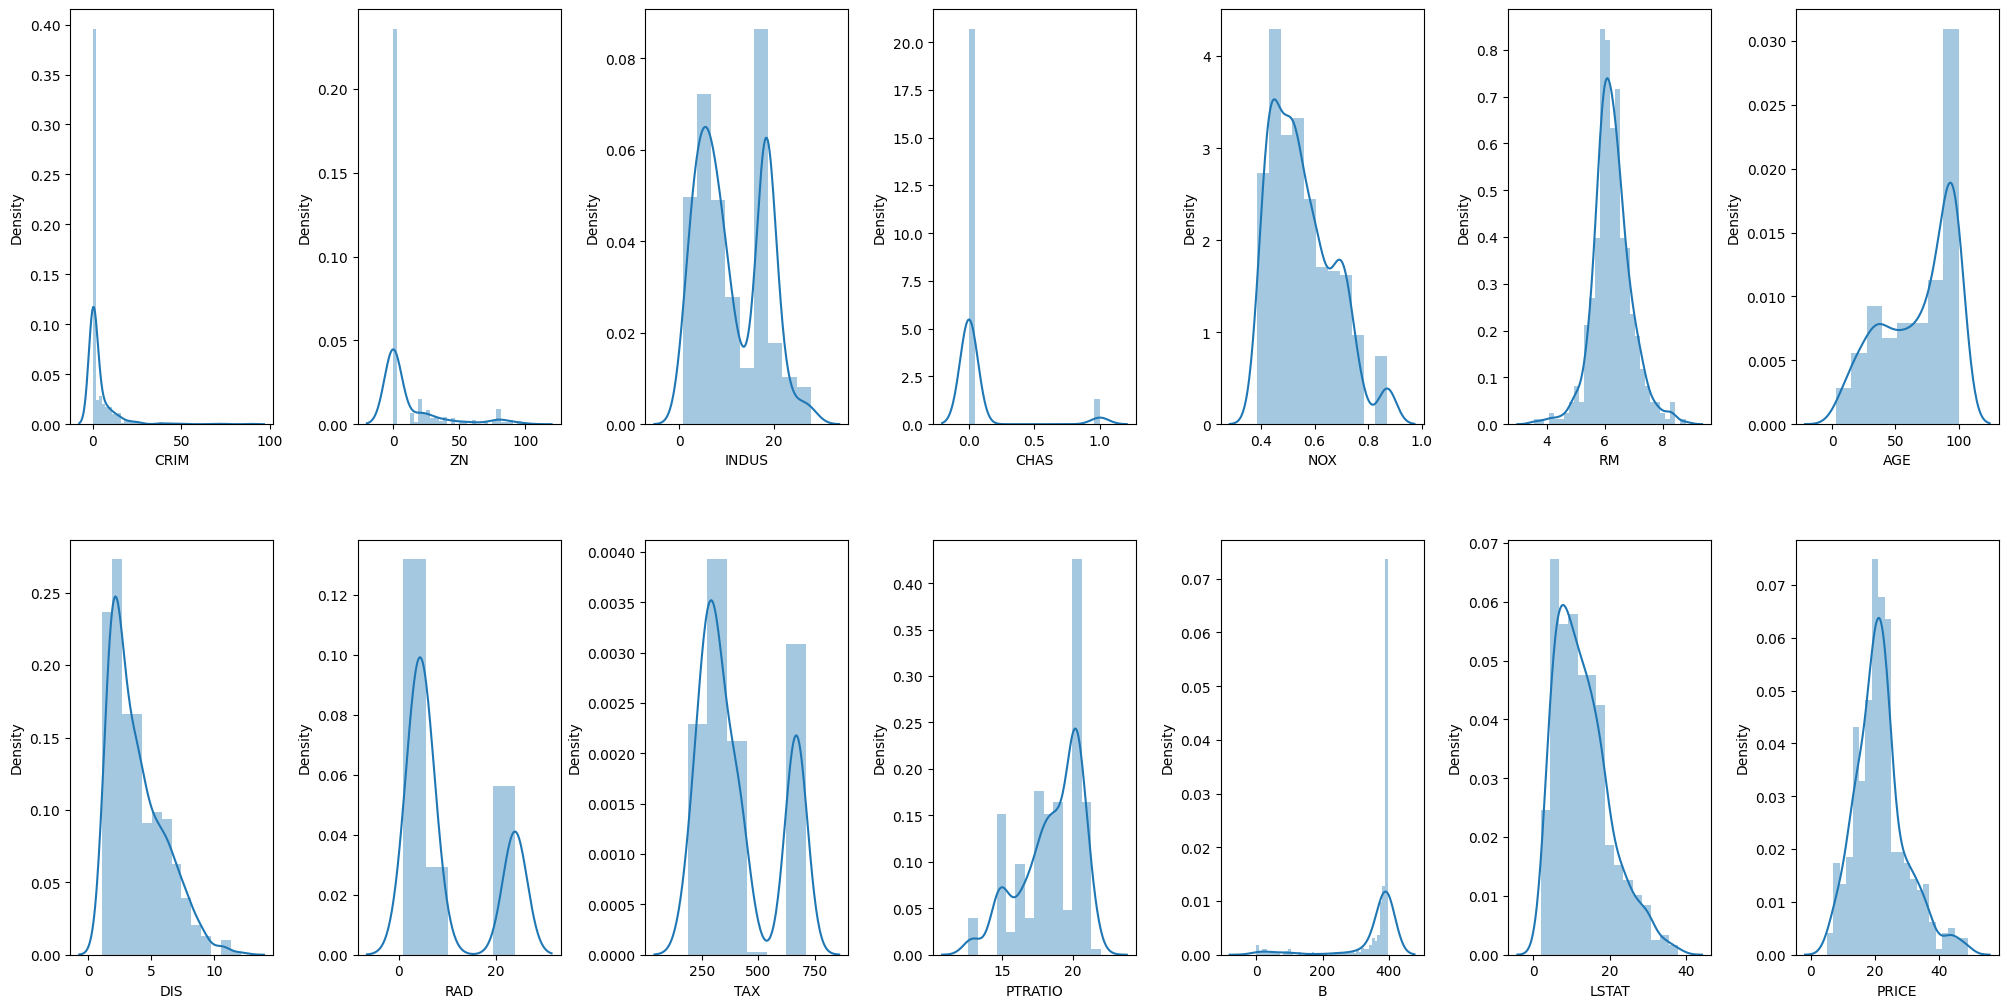

In [17]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Histogram juga menunjukkan bahwa kolom CRIM, ZN, B memiliki distribusi yang sangat miring. PRICE juga terlihat memiliki distribusi normal (prediksi) dan kolom lain tampaknya memiliki distribusi data norma atau bimodel kecuali CHAS (yang merupakan variabel diskrit).

Sekarang mari kita plot korelasi berpasangan pada data

<Axes: >

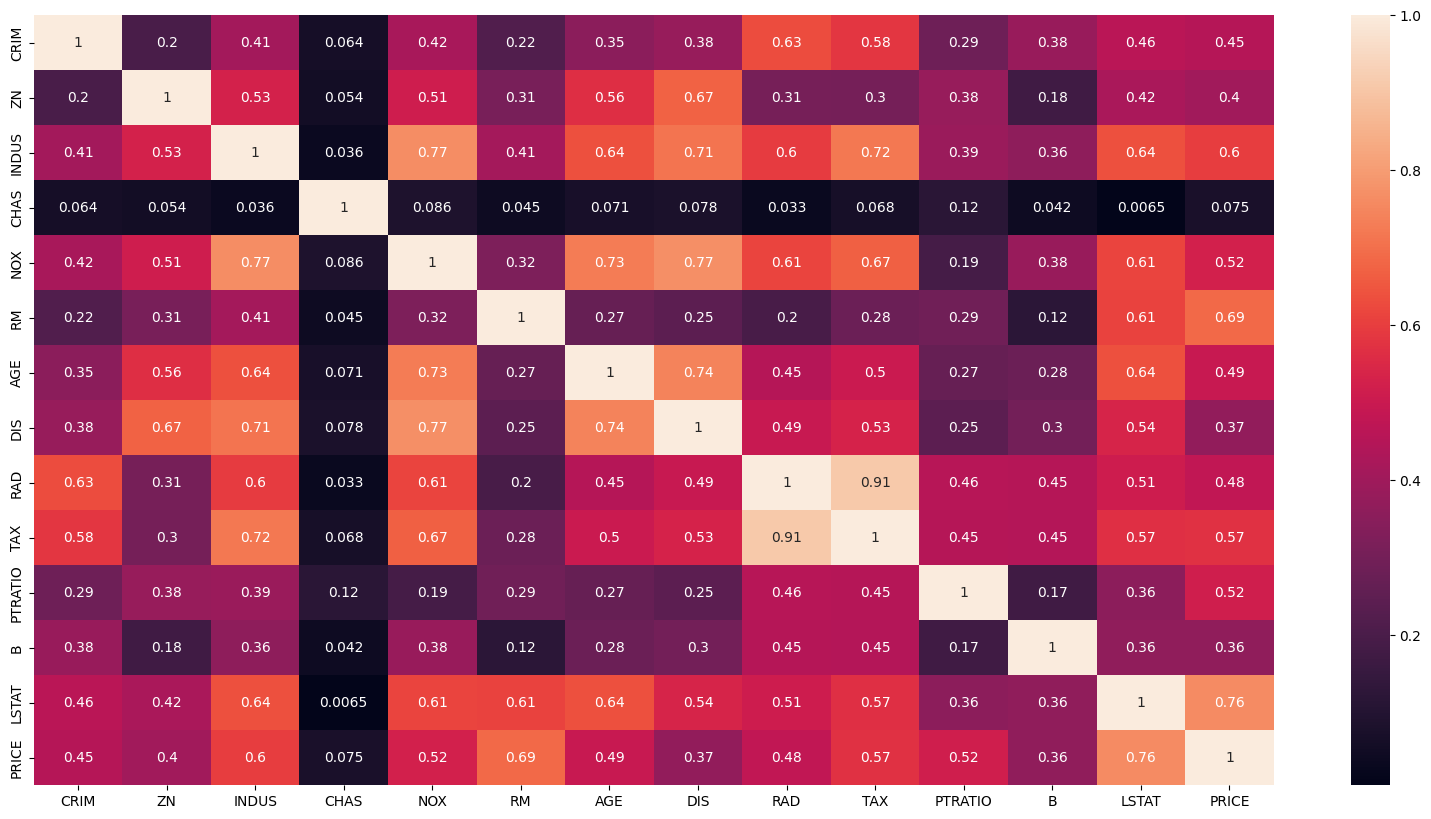

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

Dari matriks korelasi, kita melihat TAX dan RAD adalah fitur yang sangat berkorelasi. Kolom LSTAT, INDUS, RM, TAX, NOX, PTRAIO memiliki skor korelasi di atas 0,5 dengan PRICE yang merupakan indikasi yang baik untuk digunakan sebagai prediktor. Mari plot kolom ini dengan PRICE.

## Pre Processing

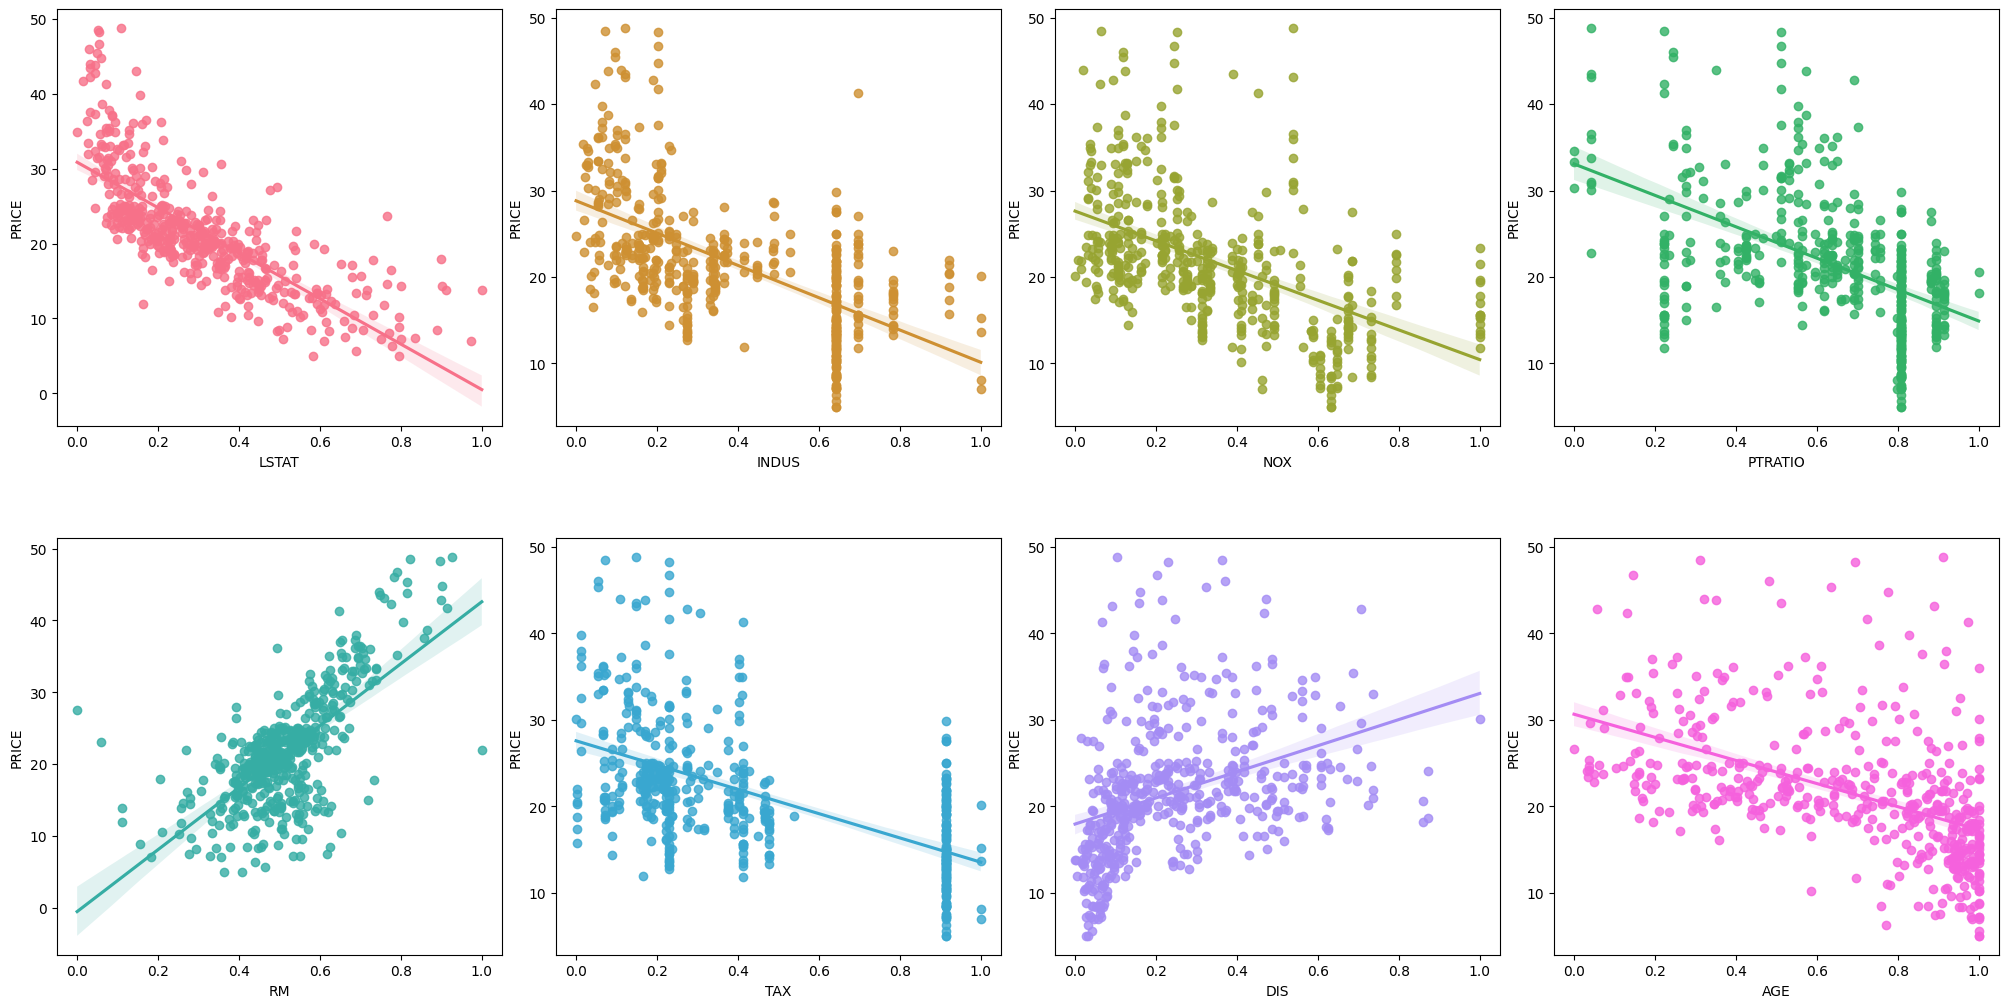

In [19]:
from sklearn import preprocessing
import numpy as np

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:, column_sels]
y = df['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Generate a list of colors
num_plots = len(column_sels)
colors = sns.color_palette("husl", num_plots)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color=colors[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Jadi dengan analisis ini, kita dapat mencoba memprediksi PRICE dengan fitur 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'. Mari kita coba menghilangkan kecondongan data melalui transformasi log.

## DATA PRE-PROCESSING

In [78]:
# Let's scale the columns before plotting them against PRICE
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = df.loc[:, column_sels]
y = df['PRICE']
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)

In [79]:
print(X.shape)
print(y.shape)

(490, 8)
(490,)


In [80]:
X.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.268711,0.641607
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.348524,0.782698
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.348524,0.599382
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.448173,0.528321


In [81]:
y =  np.log1p(y)
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
print(f"X Train : {len(X_train)}")
print(f"X Test : {len(X_test)}")
print(f"y Train : {len(y_train)}")
print(f"y Test : {len(y_test)}")

X Train : 343
X Test : 147
y Train : 343
y Test : 147


## MODEL MACHINE LEARNING

### Linier Regression

In [84]:
from sklearn.linear_model import LinearRegression
model_linier = LinearRegression(fit_intercept=True)

In [85]:
model_linier.fit(X_train,y_train)

LinearRegression()

In [86]:
# Value of y intercept
model_linier.intercept_

3.7363487490721274

In [87]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,model_linier.coef_])
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients,2,3,4,5,6,7
0,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
1,-1.315983,0.020106,-0.436389,-0.472012,0.462883,-0.273497,-0.55467,-0.081823


In [88]:
# Model prediction on train data
y_pred = model_linier.predict(X_test)

In [89]:
print(len(y_pred))
print(len(y_test))

147
147


In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_linier = mean_absolute_error(y_test,y_pred)
MSE_linier = mean_squared_error(y_test,y_pred)
RMSE_linier = np.sqrt(MSE_linier)

print(MAE_linier)
print(MSE_linier)
print(RMSE_linier)

0.13201667109703322
0.02945061871026504
0.17161182567138267


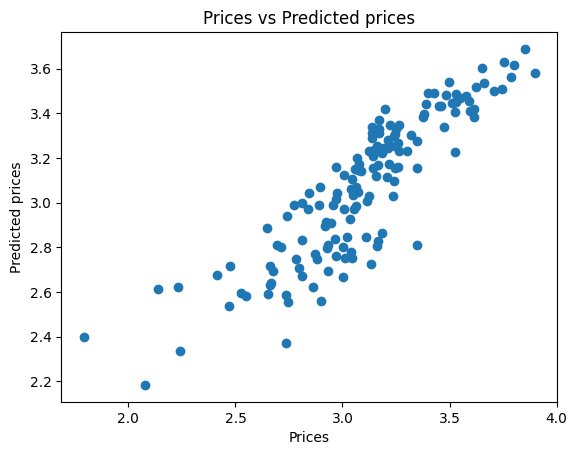

In [91]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

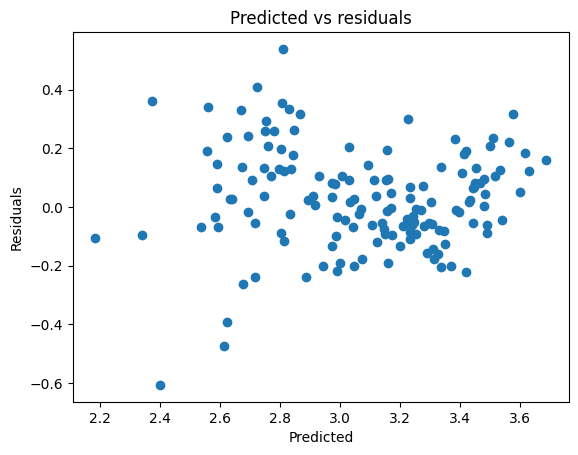

In [92]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Tidak ada pola yang terlihat dalam plot ini dan nilai didistribusikan secara merata di sekitar nol. Jadi asumsi Linearitas terpenuhi

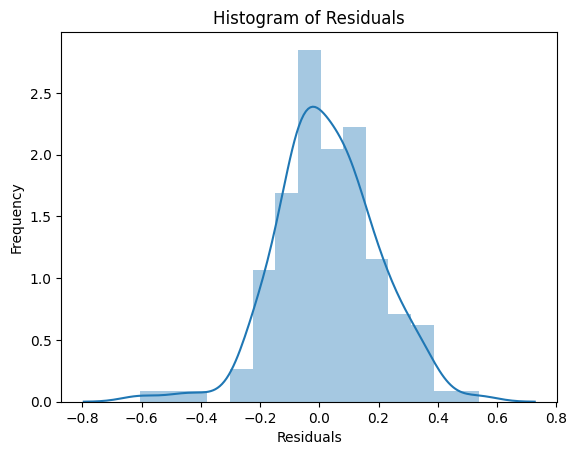

In [93]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Random Forest Regressor

In [94]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
model_reg = RandomForestRegressor()

# Train the model using the training sets
model_reg.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
# Model prediction on train data
y_pred = model_reg.predict(X_test)

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_rf = mean_absolute_error(y_test,y_pred)
MSE_rf = mean_squared_error(y_test,y_pred)
RMSE_rf = np.sqrt(MSE_rf)

print(MAE_rf)
print(MSE_rf)
print(RMSE_rf)

0.09103265185661065
0.016013289942079265
0.12654362861116028


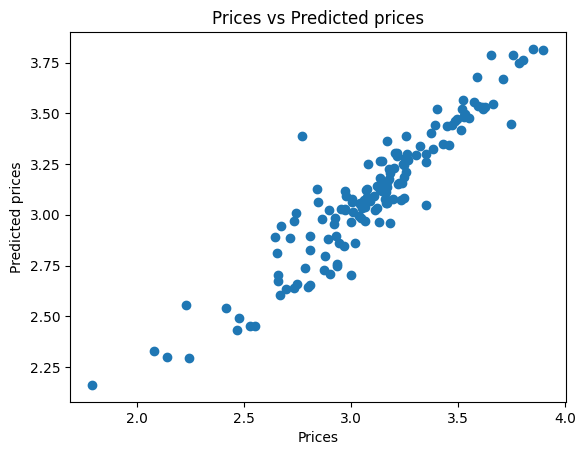

In [97]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

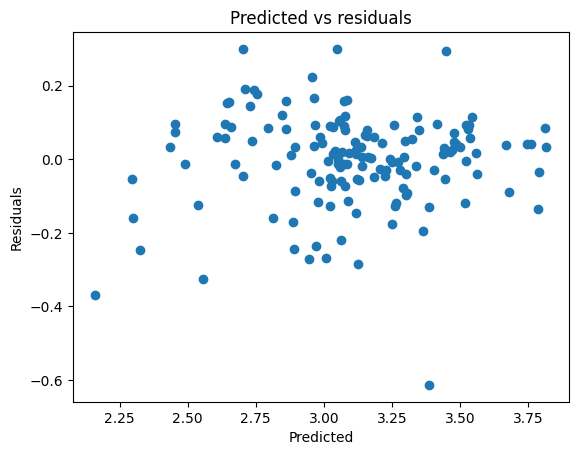

In [98]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

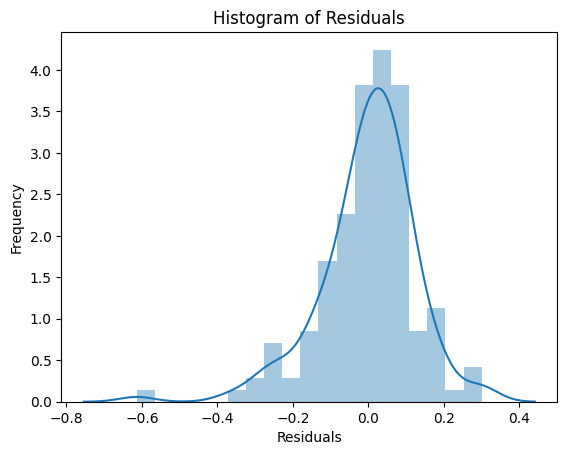

In [99]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### SVM Regression

In [100]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
model_svm = svm.SVR()

In [102]:
# Train the model using the training sets
model_svm.fit(X_train, y_train)

SVR()

In [103]:
# Model prediction on train data
y_pred = model_svm.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_svr = mean_absolute_error(y_test,y_pred)
MSE_svr = mean_squared_error(y_test,y_pred)
RMSE_svr = np.sqrt(MSE_svr)

print(MAE_svr)
print(MSE_svr)
print(RMSE_svr)

0.09886133619858013
0.01794113968988315
0.13394453960458094


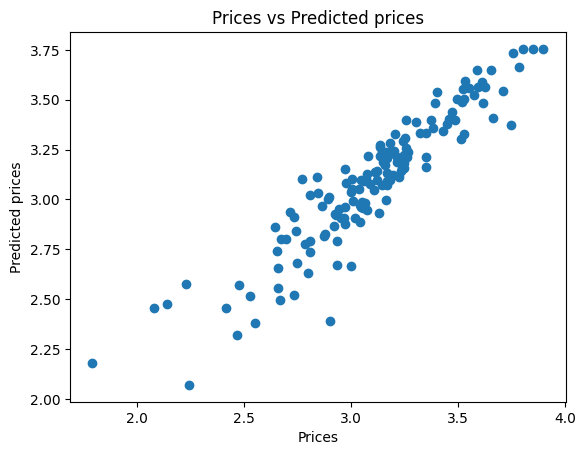

In [105]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

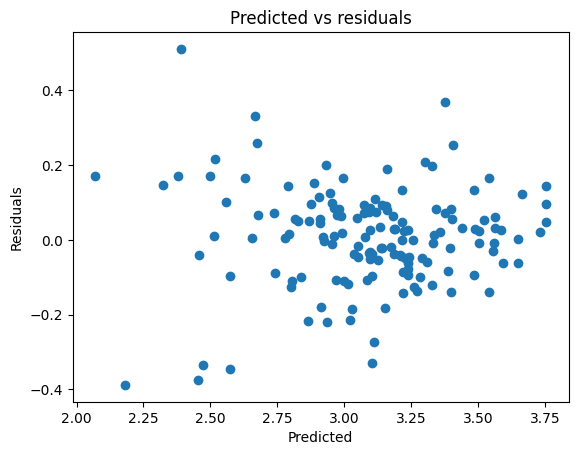

In [106]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

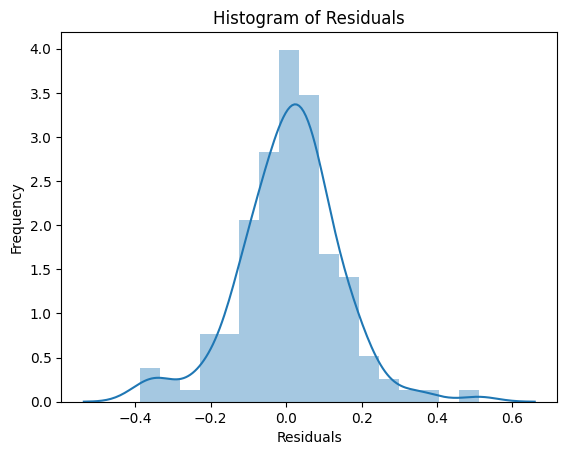

In [107]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Evaluation and comparision of all the models

In [114]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'MAE': [MAE_linier, MAE_rf, MAE_svr],
    'MSE': [MSE_linier, MSE_rf, MSE_svr],
    'RMSE': [RMSE_linier, RMSE_rf, RMSE_svr]
    })
models.sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE
1,Random Forest,0.091033,0.016013,0.126544
2,Support Vector Machines,0.098861,0.017941,0.133945
0,Linear Regression,0.132017,0.029451,0.171612


## Kesimpulan

In [ ]:
Maka Model Terbaik diantara 3 Model yang diuji pada Kasus ini adalah Model Random Forest